In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
!free -g

              total        used        free      shared  buff/cache   available
Mem:             12           2           8           0           2          11
Swap:             0           0           0


In [0]:
import pandas as pd

destinations = pd.read_csv("drive/My Drive/Colab Notebooks/dataset/destinations.csv")
test = pd.read_csv("drive/My Drive/Colab Notebooks/dataset/test.csv")
train = pd.read_csv("drive/My Drive/Colab Notebooks/dataset/ds_train.csv")

train.shape

(319954, 27)

In [0]:
# 10,000 users 

(2528243, 22)

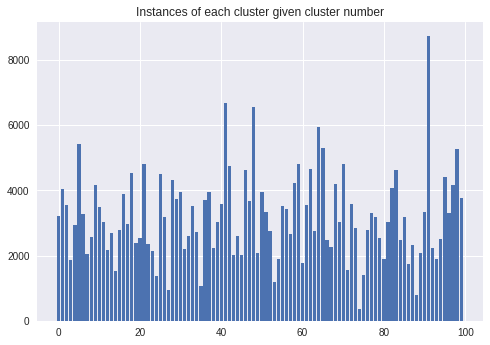

In [0]:
cluster = train['hotel_cluster'].value_counts().index
count = train['hotel_cluster'].value_counts().values

import matplotlib.pyplot as plt
plt.bar(cluster,count)
plt.title("Instances of each cluster given cluster number")
plt.show()

There seems to be no correlation between cluster number and frequency.

In [0]:
train['is_booking'].value_counts()

train = train[train['is_booking']==True]

In [0]:
test.columns

Index(['id', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market'],
      dtype='object')

In [0]:
train['is_booking'].value_counts()

1    25150
Name: is_booking, dtype: int64

In [0]:
# a stupid model

# top 5 most common clusters
most_common_clusters = list(train['hotel_cluster'].value_counts().head().index)
predictions = [most_common_clusters for i in range(train.shape[0])]

## Evaluatiing Error

> Indented block

> Indented block

> Indented block

> Indented block

> Indented block











In [0]:
! pip install ml_metrics

  Running setup.py bdist_wheel for ml-metrics ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built ml-metrics


In [0]:
import ml_metrics as metrics
target= [[l] for l in train['hotel_cluster']]

print("Mean Precision Error:", metrics.mapk(target,predictions,k=5))

Mean Precision Error: 0.07259907223326705


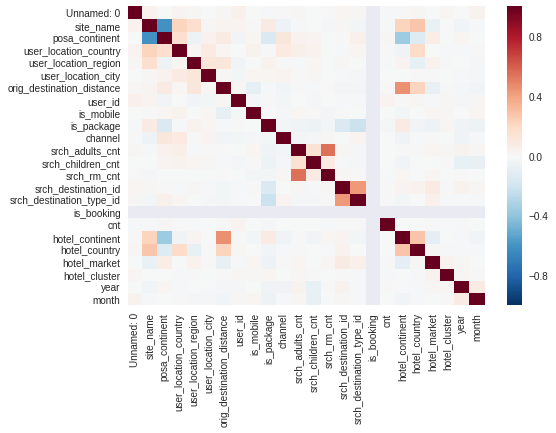

In [0]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

This means that techniques like linear and logistic regression will not work well on our dataset.

## PCA on the Destinations Data

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
dest_small = pca.fit_transform(destinations[["d{0}".format(i + 1) for i in range(149)]]
dest_small = pd.DataFrame(dest_small)
dest_small["srch_destination_id"] = destinations["srch_destination_id"]

In [0]:
# Adding features to the training set

## Model Selection

Cross validate using scoring metric outlined in the kaggle competition, CV of 3. Features were narrowed down to 5 using PCA

In [0]:
# Ensembling Methods (Train binary classifiers for each cluster)

# RF
# Bagging
# Gradient Boosting

In [0]:
# Simple Models

# Naive Bayes
# Logistic
# KNN
# ANN

In [0]:
# SVMs

# RBF
# Linear
# Poly

In [0]:
# Factorization Machine

In [0]:
# Output code Classifier

In [0]:
# Associatve Rule Learning